## GENERAL ANALYSIS 

                               Open      High       Low     Close     Volume  \
Date                                                                           
2024-06-13 00:00:00+08:00  2.416355  2.416355  2.395778  2.402637  712956419   
2024-06-14 00:00:00+08:00  2.398717  2.424194  2.391858  2.419295  897068161   
2024-06-17 00:00:00+08:00  2.403617  2.411456  2.400677  2.404597  991137042   
2024-06-18 00:00:00+08:00  2.403617  2.415375  2.398717  2.404597  621849600   
2024-06-19 00:00:00+08:00  2.405577  2.412436  2.398717  2.408516  591825062   

                           Dividends  Stock Splits  
Date                                                
2024-06-13 00:00:00+08:00        0.0           0.0  
2024-06-14 00:00:00+08:00        0.0           0.0  
2024-06-17 00:00:00+08:00        0.0           0.0  
2024-06-18 00:00:00+08:00        0.0           0.0  
2024-06-19 00:00:00+08:00        0.0           0.0  


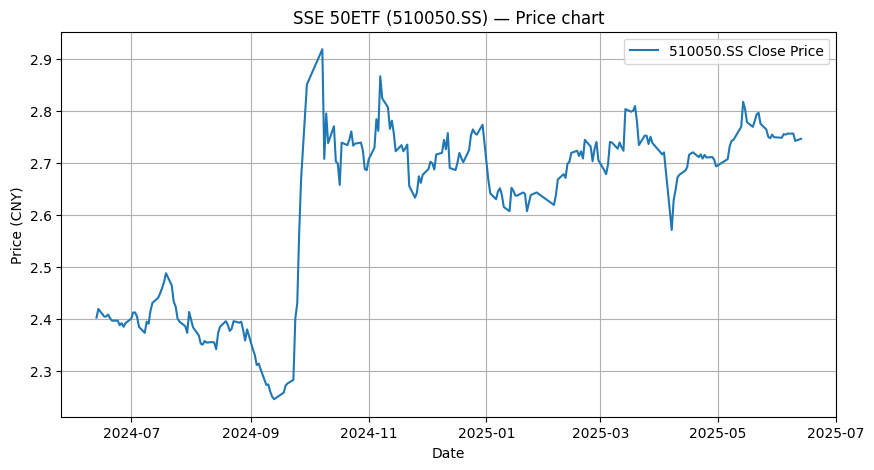

In [15]:
import yfinance as yf
import matplotlib.pyplot as plt

#get the SSA 50 ETF ticker from Yahoo Financeetf = yf.Ticker("510050.SS")

# Historical daily data for the year (or period="max" for the entire history)
hist = etf.history(period="1y", interval="1d")

print(hist.head())

# Closing price chart
plt.figure(figsize=(10,5))
plt.plot(hist.index, hist['Close'], label="510050.SS Close Price")
plt.title("SSE 50ETF (510050.SS) — Price chart")
plt.xlabel("Date")
plt.ylabel("Price (CNY)")
plt.legend()
plt.grid()
plt.show()

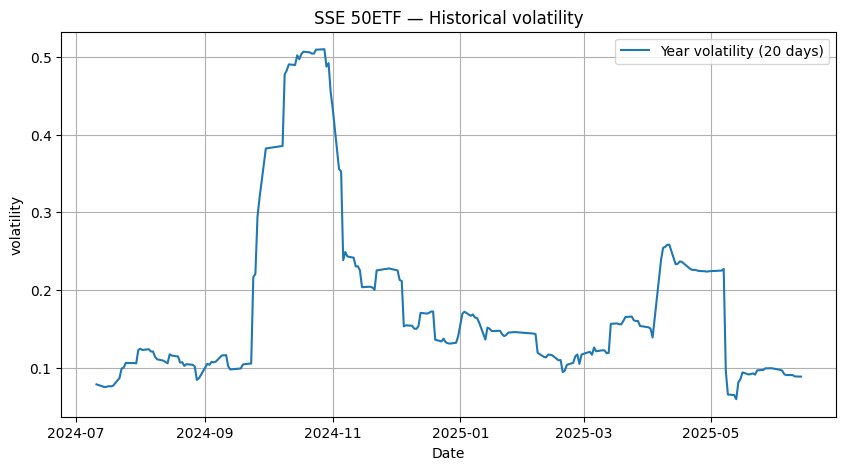

In [16]:
import numpy as np

hist['return'] = hist['Close'].pct_change()
hist['vol_20d'] = hist['return'].rolling(window=20).std() * np.sqrt(252)

plt.figure(figsize=(10,5))
plt.plot(hist.index, hist['vol_20d'], label="Year volatility (20 days)")
plt.title("SSE 50ETF — Historical volatility")
plt.xlabel("Date")
plt.ylabel("volatility")
plt.legend()
plt.grid()
plt.show()


In [17]:
min_price = hist['Close'].min()
max_price = hist['Close'].max()
last_price = hist['Close'][-1]
print(f"Year min: {min_price:.2f}, max: {max_price:.2f}, current price: {last_price:.2f}")


Year min: 2.25, max: 2.92, current price: 2.75


/var/folders/w7/xssdnkmn1jz6m2lklw2bfzvc0000gn/T/ipykernel_21400/2414641566.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_price = hist['Close'][-1]


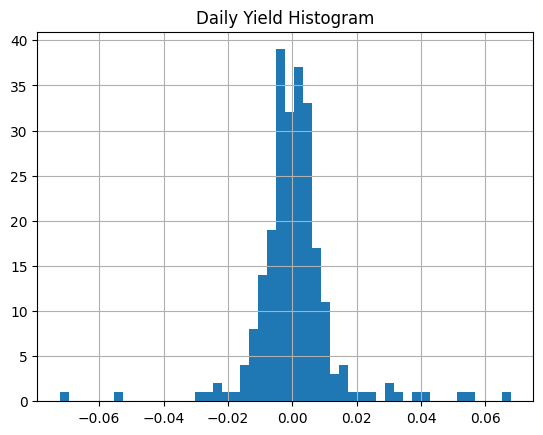

In [18]:
hist['return'] = hist['Close'].pct_change()
hist['return'].hist(bins=50)
plt.title("Daily Yield Histogram")
plt.show()


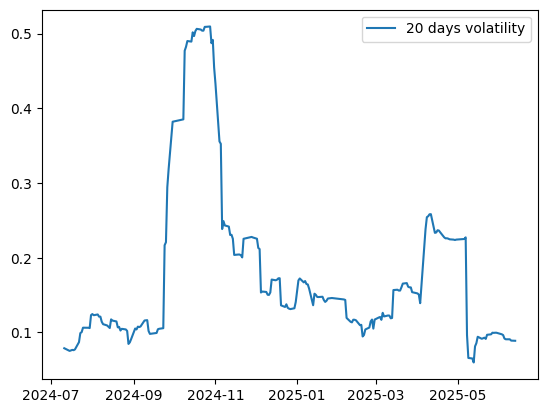

In [19]:
import numpy as np
hist['vol_20d'] = hist['Close'].pct_change().rolling(window=20).std() * np.sqrt(252)
plt.plot(hist.index, hist['vol_20d'], label="20 days volatility")
plt.legend()
plt.show()


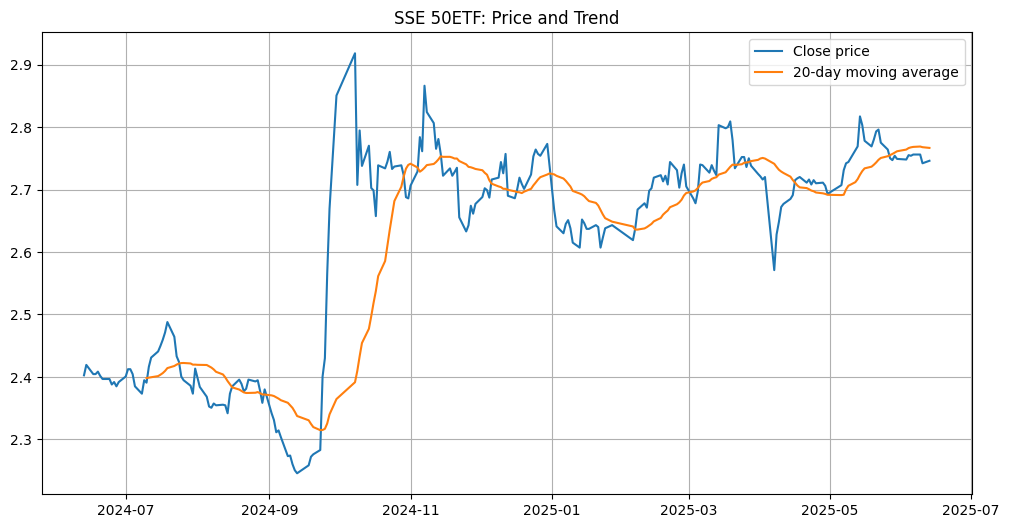

In [21]:
import matplotlib.pyplot as plt

# Добавь скользящее среднее!
hist['SMA_20'] = hist['Close'].rolling(window=20).mean()

plt.figure(figsize=(12,6))
plt.plot(hist.index, hist['Close'], label="Close price")
plt.plot(hist.index, hist['SMA_20'], label="20-day moving average")
plt.title("SSE 50ETF: Price and Trend")
plt.legend()
plt.grid()
plt.show()


In [22]:
import tushare as ts
ts.set_token('22a806f7d2672cf0a944da75699ed791d185feebc698cdda32d180c9')
pro = ts.pro_api()

In [23]:
premium_K1 = pro.opt_daily(ts_code='10009222.SH', trade_date='20250613')['close'].values[0]
premium_K2 = pro.opt_daily(ts_code='10009317.SH', trade_date='20250613')['close'].values[0]

In [27]:
print(premium_K1, premium_K2)

0.1285 0.0465


In [28]:
K1 = 2.75
K2 = 3.00
premium_K1 = pro.opt_daily(ts_code='10009222.SH', trade_date='20250613')['close'].values[0]
premium_K2 = pro.opt_daily(ts_code='10009317.SH', trade_date='20250613')['close'].values[0]


net_premium = premium_K1 - premium_K2

scenarios = {
    'Bull': 2.90,
    'Base': 2.75,
    'Bear': 2.40
}

for name, S in scenarios.items():
    payoff = max(S - K1, 0) - max(S - K2, 0) - net_premium
    print(f"{name} scenario (Price={S}): Payoff = {payoff:.2f} ¥")


Bull scenario (Price=2.9): Payoff = 0.07 ¥
Base scenario (Price=2.75): Payoff = -0.08 ¥
Bear scenario (Price=2.4): Payoff = -0.08 ¥
